# IRIS 다중분류

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras import layers

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

SEED = 123

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/devdio/flyai_datasets/main/iris.csv')
df

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df = df.sample(frac=1,random_state=SEED)
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
72,6.3,2.5,4.9,1.5,versicolor
112,6.8,3.0,5.5,2.1,virginica
132,6.4,2.8,5.6,2.2,virginica
88,5.6,3.0,4.1,1.3,versicolor
37,4.9,3.6,1.4,0.1,setosa


In [5]:
df.columns

Index(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width',
       'Species'],
      dtype='object')

## data 분리

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop('Species',axis=1)
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

## 수치형 데이터 전처리
- 스케일링

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)


## 범주형 데이터 전처리
- 인코딩

In [9]:
y_train.unique()

array(['setosa', 'virginica', 'versicolor'], dtype=object)

In [10]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
y_train_e = encoder.fit_transform(y_train.to_numpy().reshape(-1,1))
y_test_e = encoder.transform(y_test.to_numpy().reshape(-1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [11]:
y_train_e

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1

## 모델 생성

In [12]:
X_train_s.shape, y_train_e.shape

((120, 4), (120, 3))

In [36]:
from keras import layers
model = keras.Sequential([
    layers.Dense(units=8,activation ='relu',input_shape=(4,)),
    layers.Dense(units=5,activation='relu'),
    layers.Dense(units=3,activation='softmax'),
])

In [37]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

EPOCHS = 200
BATCH_SIZE = 16

history = model.fit(X_train_s,
                    y_train_e,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_split = 0.2)

Epoch 1/200
6/6 [==============================] - 1s 58ms/step - loss: 0.6970 - accuracy: 0.3021 - val_loss: 0.6865 - val_accuracy: 0.2500
Epoch 2/200
6/6 [==============================] - 0s 13ms/step - loss: 0.6898 - accuracy: 0.3333 - val_loss: 0.6787 - val_accuracy: 0.2500
Epoch 3/200
6/6 [==============================] - 0s 13ms/step - loss: 0.6830 - accuracy: 0.3333 - val_loss: 0.6711 - val_accuracy: 0.3333
Epoch 4/200
6/6 [==============================] - 0s 13ms/step - loss: 0.6765 - accuracy: 0.3438 - val_loss: 0.6637 - val_accuracy: 0.4167
Epoch 5/200
6/6 [==============================] - 0s 15ms/step - loss: 0.6699 - accuracy: 0.3333 - val_loss: 0.6566 - val_accuracy: 0.4583
Epoch 6/200
6/6 [==============================] - 0s 21ms/step - loss: 0.6637 - accuracy: 0.3021 - val_loss: 0.6494 - val_accuracy: 0.5000
Epoch 7/200
6/6 [==============================] - 0s 19ms/step - loss: 0.6575 - accuracy: 0.3125 - val_loss: 0.6422 - val_accuracy: 0.5000
Epoch 8/200
6/6 [===

In [38]:
y_pred = model.predict(X_test_s)
y_pred

1/1 [==============================] - 0s 61ms/step


array([[9.9999052e-01, 6.1688961e-06, 3.2038929e-06],
       [8.8743336e-04, 8.7716401e-01, 1.2194854e-01],
       [9.9999648e-01, 4.1277355e-07, 3.1244897e-06],
       [1.5844745e-06, 8.4556667e-03, 9.9154276e-01],
       [1.4279963e-03, 4.8948696e-01, 5.0908500e-01],
       [5.8917267e-06, 9.7145438e-01, 2.8539699e-02],
       [9.9999720e-01, 2.4497547e-07, 2.5025367e-06],
       [3.0151159e-03, 9.9691314e-01, 7.1780436e-05],
       [3.5317063e-10, 1.4625116e-04, 9.9985385e-01],
       [7.7362498e-04, 9.8902065e-01, 1.0205697e-02],
       [1.0349018e-02, 6.2003511e-01, 3.6961591e-01],
       [9.0338336e-04, 9.9723303e-01, 1.8636478e-03],
       [8.1300163e-07, 4.2001684e-03, 9.9579906e-01],
       [1.1631661e-04, 9.9854463e-01, 1.3389849e-03],
       [9.9998385e-01, 1.1041226e-05, 5.0355352e-06],
       [2.6795108e-04, 9.9959904e-01, 1.3301593e-04],
       [9.9999744e-01, 2.5328055e-07, 2.2638399e-06],
       [9.9999541e-01, 5.6697394e-07, 3.8911198e-06],
       [7.6660683e-05, 9.991

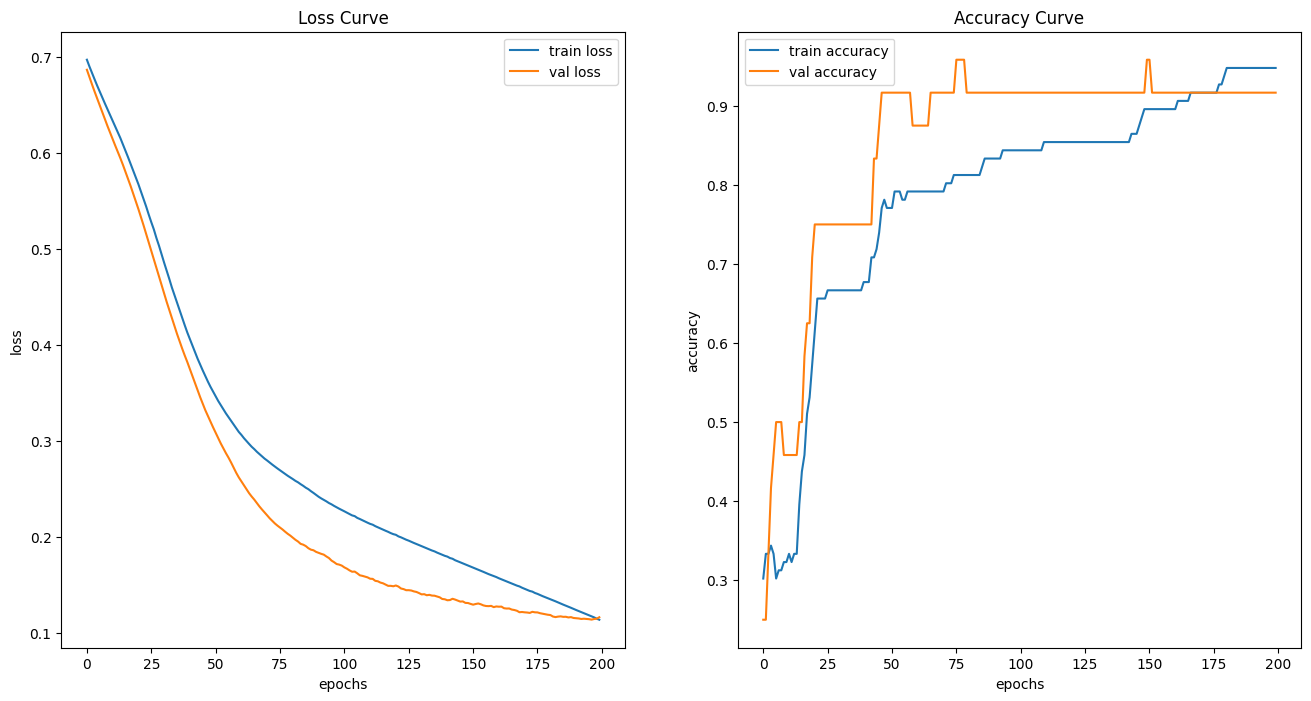

In [39]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.show()

plot_history(history)

In [40]:
import numpy as np

y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test_e,axis=1)
y_pred

array([0, 1, 0, 2, 2, 1, 0, 1, 2, 1, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 2, 0, 0, 1, 2, 2])

In [41]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score
from sklearn.metrics import confusion_matrix

def print_metrics(y_true, y_pred, aver='binary'):
    print('accuracy:', accuracy_score(y_true, y_pred))
    print('recall:', recall_score(y_true, y_pred ,average=aver))
    print('precision:', precision_score(y_true, y_pred,average=aver))
    print('f1 :', f1_score(y_true, y_pred, average=aver))

    cfm = confusion_matrix(y_true, y_pred)
    s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)
    s.set(xlabel='Prediction', ylabel='Actual')
    plt.show()

In [42]:
y_pred.shape, y_test.shape

((30,), (30,))

accuracy: 0.9
recall: 0.8888888888888888
precision: 0.9010989010989011
f1 : 0.8933333333333332


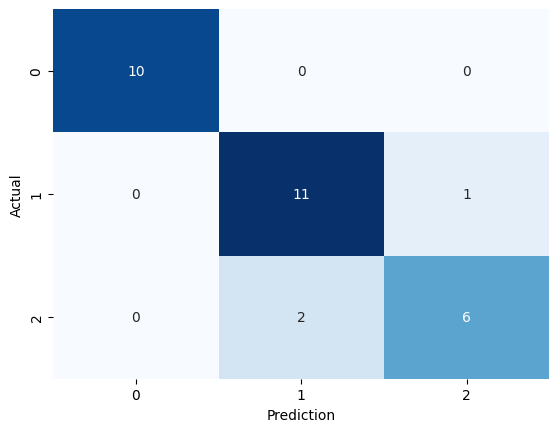

In [43]:
print_metrics(y_test, y_pred, aver='macro')